# Transferencia de Aprendizaje  para la Clasificación de Billetes Mexicanos.

Se utilizó una arquitectura de red MobileNet V2, entrenada con la base de datos Imagenet, para la aplicación de transferencia de aprendizaje en el desarrollo de un clasificador de billetes mexicanos.

**Autor:**  M. en C. Mario Xavier Canche Uc, Mayo 2020, *mario.canche@cimat.mx*  
**Basado en:** 
- https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb
- https://github.com/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb

**Material de referencia:**
- https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38
- https://medium.com/metadatos/qué-es-la-transferencia-de-aprendizaje-y-cómo-aplicarla-a-tu-red-neuronal-e0e120156e40

# Cargamos las librerias

In [1]:
# Importamos las librerias
from numpy import expand_dims, argmax
from tensorflow.keras.models import load_model
from sys import argv

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Cargamos el modelo

In [2]:
# Cargamos el Modelo entrenado
model = load_model("save/save_colab/denom.h5")

In [3]:
# Cargamos las etiquetas
map_denom={0:'1000F_Anv', 
           1:'100FC_Anv', 
           2:'100FC_Rev', 
           3:'100F_Anv', 
           4:'100F_Rev', 
           5:'200FConm_Anv', 
           6:'200FConm_Rev', 
           7:'200F_Anv', 
           8:'200F_Rev', 
           9:'20F_Anv', 
           10:'20F_Rev', 
           11:'500D1_Anv', 
           12:'500D1_Rev', 
           13:'500F_Anv', 
           14:'500F_Rev', 
           15:'500G_Anv', 
           16:'50F1_Anv', 
           17:'50F1_Rev',
           18:'50F_Anv',
           19:'50F_Rev'}


In [4]:
# Definimos el clasificador
def denominar(archivo_src):
    """ Funcion para denominar una pieza recortada y rotada 
        INPUT:   archivo_src = path de la imagen a recortar
        OUTPUT:  denom = denominacion detectada
    """

    # Leemos una imagen
    im_re = image.load_img(archivo_src, target_size=(224, 224))
    im_re = image.img_to_array(im_re)*1./255

    # Detectamos la denominacion con una Resnet50
    x = expand_dims(im_re,axis=0)
    preds = model.predict(x)
    denom = map_denom[argmax(preds)]

    return denom

## Testing

In [5]:
# Rutas de las imagenes a procesar
archivo_src = ["billetes/billete-de-1000-pesos-mexicanos-1000-mxn-anverso.jpg",
               "billetes/billete_100_pesos.jpg",
               "billetes/0825_BILLETE3.jpg",
               "billetes/portadabillete2_crop1500753279893.jpg_759710130.jpg",
               "billetes/1366_2000.jpg",
               "billetes/nuevo-billete-de-500-pesos-mexicanos-50-medium.png",
               "billetes/D_NQ_NP_762521-MLM42466503071_072020-O.jpg",
               "billetes/Billete_$100_Mexico_Tipo_D_Reverso.jpg",
               "billetes/billete_20_pesos_2007_r.jpg"
              ]

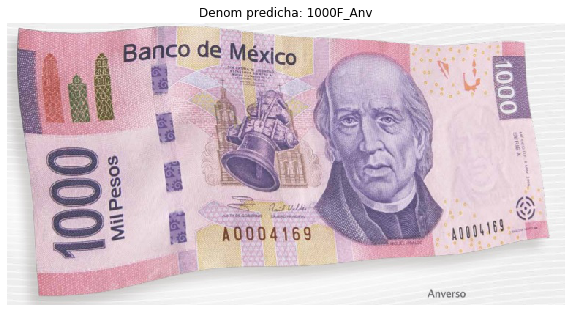

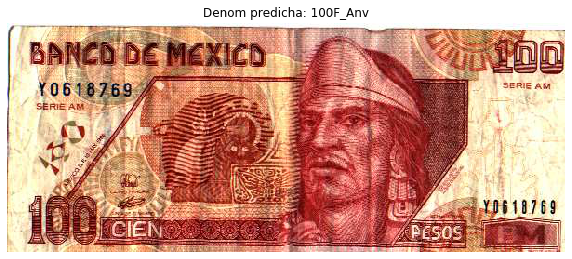

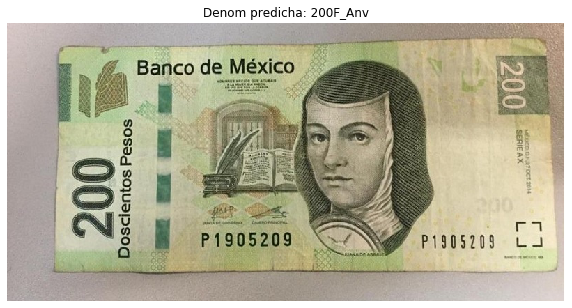

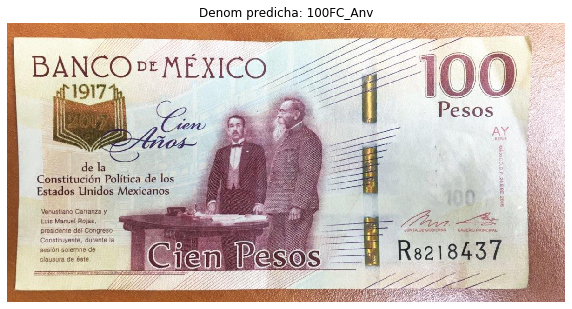

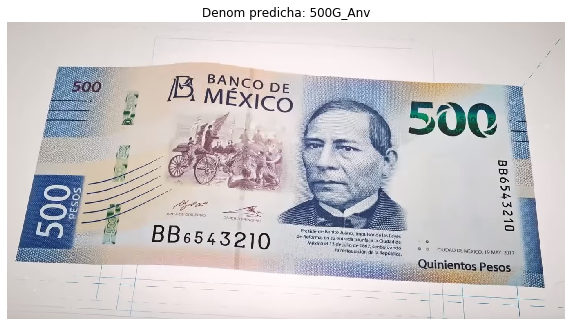

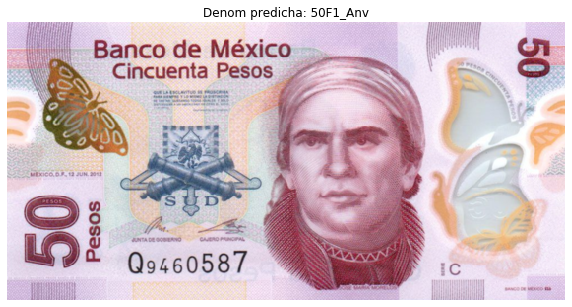

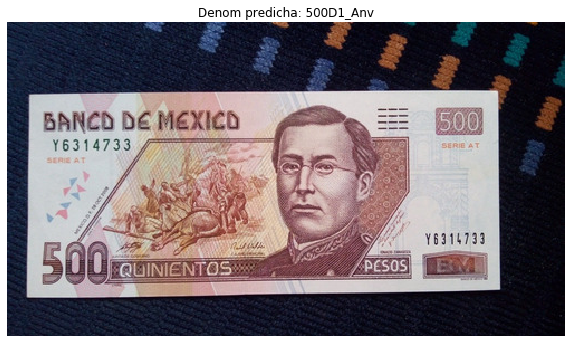

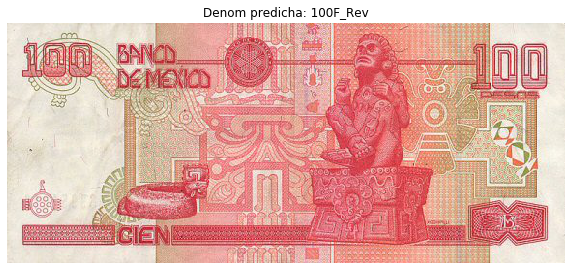

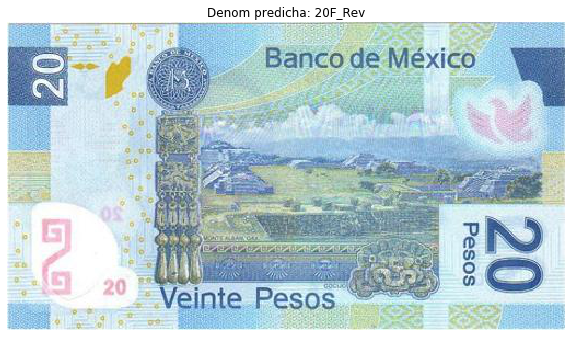

In [6]:
# Procesamos cada imagen
for archivo in archivo_src:
    denom = denominar(archivo)
    
    # Visualizamos la imagen
    im_re = image.load_img(archivo)
    plt.figure(figsize=(10,10))
    plt.imshow(im_re)
    plt.title('Denom predicha: ' + denom )
    plt.axis('off')
    plt.show()